## Observations and Insights 
* Ramicane and Capomulin both showed similarly promising results in reducing tumor sizes, but the results from Capomulin are slightly more consistent as shown by its smaller interquartile range.

* The results of all 4 drug regimens of interest - Ramicane, Capomulin, Infubinol, and Ceftamin - were consistent, producing only 1 outlying data point among all 4 regimens. This shows that Ramicane and Capomulin were consistently effective, while Infubinol and Ceftamin were consistently less effective.

* For specimens given Capomulin, there is a very strong direct correlation between specimen weight and its tumor size. This, however, could mean one of 2 things: either a specimen's tumor shrinks accordingly if the specimen loses weight while being given the drug, or just that bigger mice have bigger tumors. Either way, a mouse's weight may be a good indicator to how much we can expect to reduce its tumor size with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
dup_mouseids = combined_df[["Mouse ID"]].iloc[duplicates[duplicates].index]
dup_mouseids = dup_mouseids.drop_duplicates()
dup_mouseids

,Mouse ID
908,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_all_df = combined_df.loc[combined_df["Mouse ID"] == 'g989']
dup_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(dup_all_df.index)
clean_df.loc[clean_df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = len(clean_df['Mouse ID'].unique())
clean_df_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_reg_grp = clean_df.groupby(["Drug Regimen"])
drug_reg_mean = drug_reg_grp['Tumor Volume (mm3)'].mean()
drug_reg_med = drug_reg_grp['Tumor Volume (mm3)'].median()
drug_reg_var = drug_reg_grp['Tumor Volume (mm3)'].var()
drug_reg_std = drug_reg_grp['Tumor Volume (mm3)'].std()
drug_reg_sem = drug_reg_grp['Tumor Volume (mm3)'].sem()

drug_reg_df = pd.DataFrame(drug_reg_mean)
drug_reg_df = drug_reg_df.rename(columns={'Tumor Volume (mm3)' : 'mean'})
drug_reg_df["median"] = drug_reg_med
drug_reg_df["var"] = drug_reg_var
drug_reg_df["std"] = drug_reg_std
drug_reg_df["sem"] = drug_reg_sem

drug_reg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
functions = ['mean', 'median', 'var', 'std', 'sem']
drug_reg_df2 = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(functions)
drug_reg_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Specimens by Regimen')

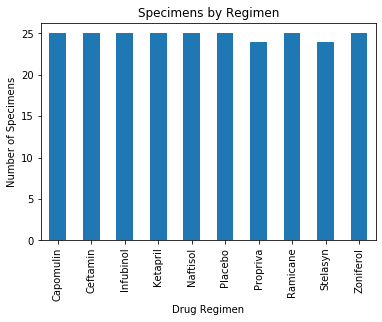

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_reg_count = drug_reg_grp["Mouse ID"].nunique()
ax = drug_reg_count.plot(kind='bar')
ax.set_ylabel('Number of Specimens')
ax.set_title('Specimens by Regimen')

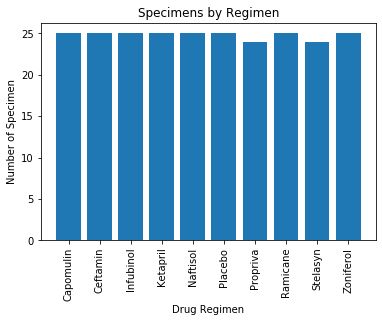

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = drug_reg_count.keys()
y_axis = drug_reg_count.array
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Specimen")
plt.title("Specimens by Regimen")
plt.savefig("../Images/SpecimensByRegimen.png")
plt.show()

Text(0, 0.5, '')

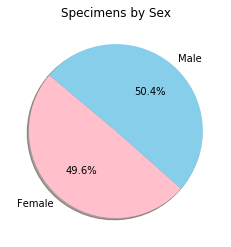

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_grp = clean_df.groupby(['Sex'])
sex_count = sex_grp['Mouse ID'].nunique()
ax = sex_count.plot(kind="pie", title="Specimens by Sex", colors=["Pink", "SkyBlue"], autopct="%1.1f%%", shadow=True, startangle=140)
ax.set_ylabel("")

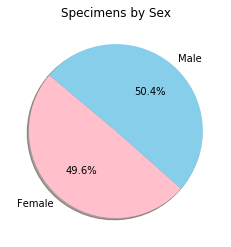

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.keys(), colors=["Pink", "SkyBlue"], autopct="%1.1f%%", shadow=True, startangle=140)
plt.xlabel("")
plt.title("Specimens by Sex")
plt.savefig("../Images/SpecimensBySex.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
filtered_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_grp = filtered_df.groupby("Mouse ID")
mouse_max_timept = mouse_grp["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
fin_tumor_df = clean_df.merge(mouse_max_timept, on=["Mouse ID", "Timepoint"], how="inner")
fin_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = fin_tumor_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = fin_tumor_df[fin_tumor_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(tumor_vol.array)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"For {treatment}:")
    print(f"  * The lower quartile of final tumor volume is {lowerq} mm3.")
    print(f"  * The upper quartile of final tumor volume is {upperq} mm3.")
    print(f"  * The interquartile range of final tumor volume is {iqr}.")
    print(f"  * The median final tumor volume is {quartiles[0.5]} mm3.")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(tumor_vol.head())
    outliers = tumor_vol[tumor_vol.between(lower_bound, upper_bound) == False]
    
    print(f"  * Values below {lower_bound} could be outliers.")
    print(f"  * Values above {upper_bound} could be outliers.")
    print(f"  * Potential outliers:")
    
    for outlier in outliers.array:
        print(f"      * {str(outlier)}")
    
    print("--------------------------------------------------------------")

For Ramicane:
  * The lower quartile of final tumor volume is 31.56046955 mm3.
  * The upper quartile of final tumor volume is 40.65900627 mm3.
  * The interquartile range of final tumor volume is 9.098536719999998.
  * The median final tumor volume is 36.56165229 mm3.
  * Values below 17.912664470000003 could be outliers.
  * Values above 54.30681135 could be outliers.
  * Potential outliers:
--------------------------------------------------------------
For Capomulin:
  * The lower quartile of final tumor volume is 32.37735684 mm3.
  * The upper quartile of final tumor volume is 40.1592203 mm3.
  * The interquartile range of final tumor volume is 7.781863460000004.
  * The median final tumor volume is 38.125164399999996 mm3.
  * Values below 20.70456164999999 could be outliers.
  * Values above 51.83201549 could be outliers.
  * Potential outliers:
--------------------------------------------------------------
For Infubinol:
  * The lower quartile of final tumor volume is 54.04860769

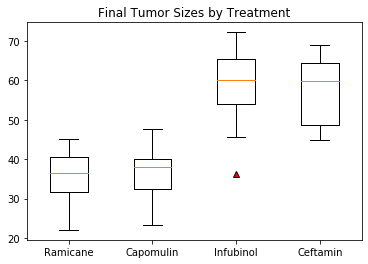

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Final Tumor Sizes by Treatment")
red_triangle = dict(markerfacecolor='Red', marker='^')
ax.boxplot(tumor_data, labels=treatments, flierprops=red_triangle)
plt.savefig("../Images/FinalTumorSizesByTreatment.png")
plt.show()

## Line and Scatter Plots

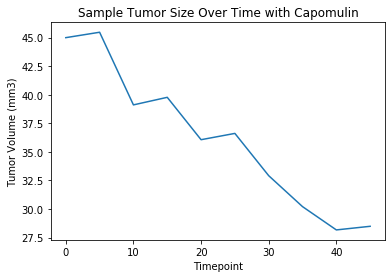

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df = clean_df[clean_df["Mouse ID"] == "x401"]
x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Sample Tumor Size Over Time with Capomulin")
plt.savefig("../Images/SampleTumorSizeOverTimeWithCapomulin.png")
plt.show()

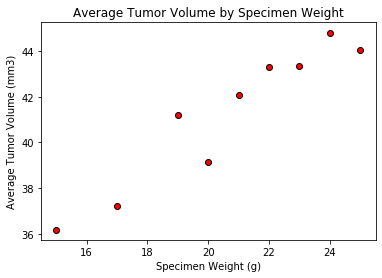

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_grp = capomulin_df.groupby("Weight (g)")
data = capomulin_mouse_grp["Tumor Volume (mm3)"].mean()

plt.scatter(data.keys(), data.array, marker='o', facecolors="red", edgecolors="black")
plt.xlabel("Specimen Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Specimen Weight")
plt.savefig("../Images/AverageTumorVolumeBySpecWeight.png")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor size with Capomulin is 0.95


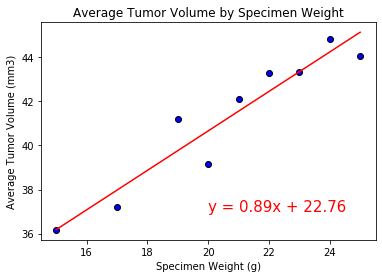

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(data.keys(), data.array)
print(f"The correlation between weight and average tumor size with Capomulin is {round(correlation[0],2)}")

x_values = data.keys()
y_values = data.array
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,37), fontsize=15, color='red')
plt.xlabel("Specimen Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Specimen Weight")
plt.savefig("../Images/AverageTumorVolumeBySpecWeight_regress.png")
plt.show()